**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
tweet = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweet.shape

(7613, 5)

**EDA**

In [5]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 80

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


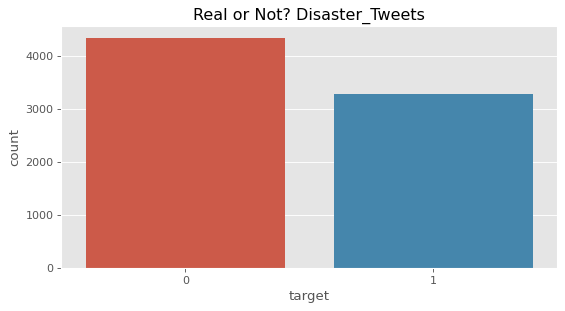

In [6]:
sns.countplot('target', data = tweet)
plt.title('Real or Not? Disaster_Tweets');

In [7]:
tweet['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

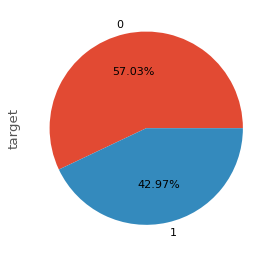

In [8]:
tweet['target'].value_counts().plot.pie(autopct = '%1.2f%%');

**Number of character Distribution**

In [9]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gomxocuw
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-gomxocuw


In [10]:
import preprocess_kgptalkie as kgp

In [11]:
tweet = kgp.get_basic_features(tweet)
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


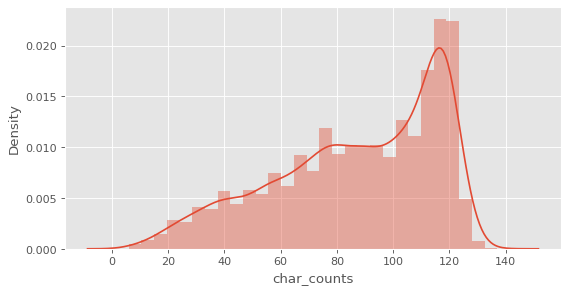

In [12]:
sns.distplot(tweet['char_counts']);

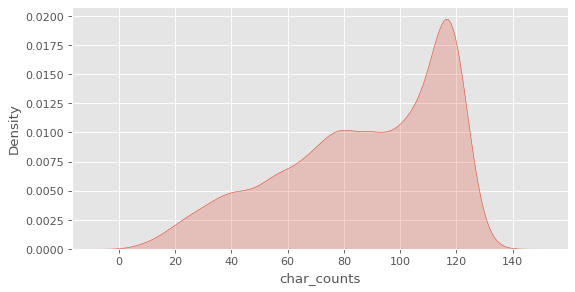

In [13]:
sns.kdeplot(tweet['char_counts'], shade=True)

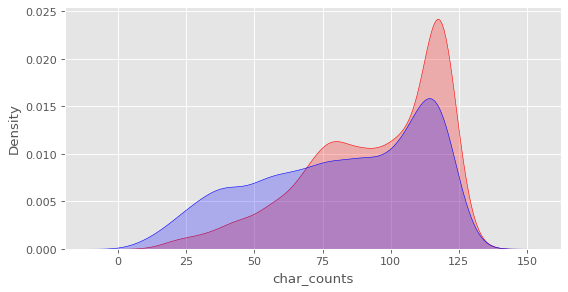

In [14]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')

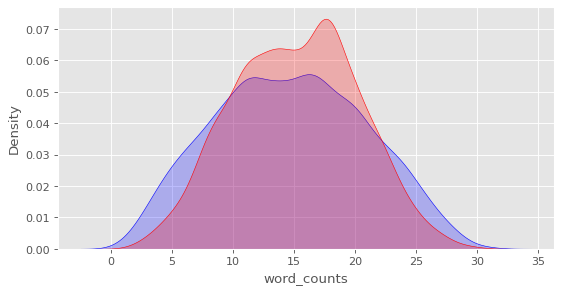

In [15]:
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade = True, color = 'b')
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade = True, color = 'r');

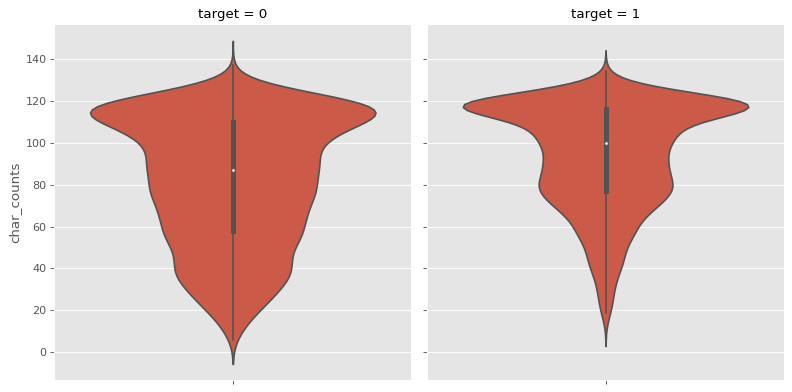

In [16]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='target')

In [17]:
#Number of words, Avg words length and stop words **distribution**

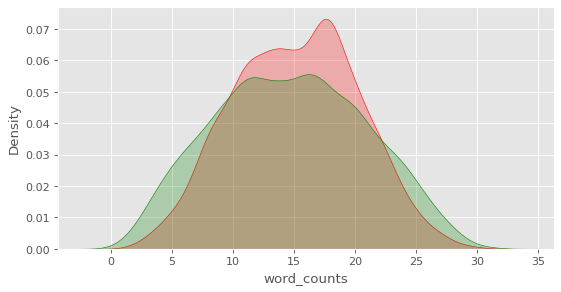

In [18]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='green')

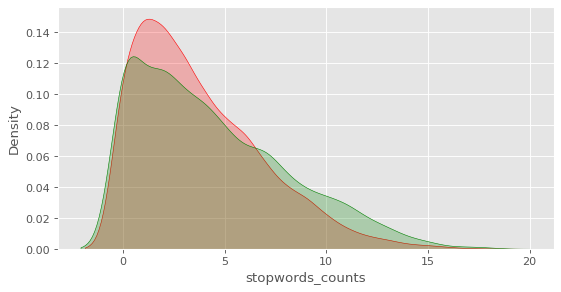

In [19]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='green')

**Most and Least Common Word**

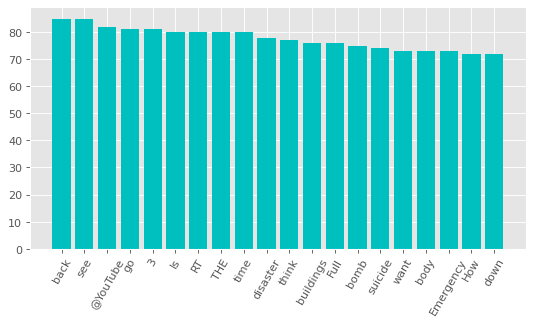

In [20]:
freq = kgp.get_word_freqs(tweet, 'text')

top20 = freq[100:120]

plt.bar(top20.index,top20.values, color = 'c')
plt.xticks(rotation = 60);

In [21]:
least20 = freq[-20:]
least20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64

In [22]:
bigram = kgp.get_ngram(tweet,'text',ngram_range=2)
bigram[-20:]

[('00end date', 19),
 ('0000 utc', 18),
 ('000 riot', 17),
 ('000 people', 16),
 ('000 gems', 15),
 ('00 white', 14),
 ('00 tonight', 13),
 ('00 to', 12),
 ('00 thursday', 11),
 ('00 thread', 10),
 ('00 pm', 9),
 ('00 in', 8),
 ('00 http', 7),
 ('00 hiroshima', 6),
 ('00 bestseller', 5),
 ('00 at', 4),
 ('00 am', 3),
 ('00 52', 2),
 ('00 25', 1),
 ('00 11', 0)]

**Data Cleaning**

In [23]:
def get_clean(x):
  x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
  x = kgp.cont_exp(x)
  x = kgp.remove_emails(x)
  x = kgp.remove_urls(x)
  x = kgp.remove_html_tags(x)
  x = kgp.remove_rt(x)
  x = kgp.remove_accented_chars(x)
  x = kgp.remove_special_chars(x)
  x = kgp.remove_dups_char(x)
  return x

In [24]:
tweet['text'] = tweet['text'].apply(lambda x : get_clean(x))

In [25]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [26]:
  real = kgp.get_word_freqs(tweet[tweet['target']==1],'text')
  real = ' '.join(real.index)
  real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

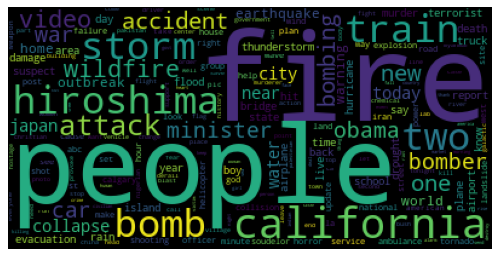

In [27]:
word_cloud= WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

**TFIDF and SVM**

In [28]:
text = tweet['text']
y = tweet['target']

In [29]:
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(text)

In [30]:
X.shape

(7613, 22545)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,tweet['target'],test_size=.2,random_state=0,stratify=tweet['target'])

In [32]:
X_train.shape,X_test.shape

((6090, 22545), (1523, 22545))

In [33]:
from sklearn.svm import LinearSVC

In [34]:
clf = LinearSVC()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
confusion_matrix(y_test,y_pred)

array([[775,  94],
       [201, 453]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



**Word2Vec with SVM**

In [84]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 53.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [37]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [38]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [40]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(str(x)))

In [41]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1,1)

In [42]:
X = np.concatenate(np.concatenate(X,axis=0),axis=0).reshape(-1,300)

In [43]:
y = tweet['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0, stratify = y)

In [45]:
X_train.shape, X_test.shape

((6090, 300), (1523, 300))

In [46]:
clf1 = LinearSVC()

In [47]:
clf1.fit(X_train,y_train)

LinearSVC()

In [48]:
y_pred = clf1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

